<a href="https://colab.research.google.com/github/hcnancho/lickan_ventas_2023/blob/main/lickan_deep_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploracion de Datos LickanPets

*   Importación de las Librerias
*   Conexión con Google Drive

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_lickan = pd.read_excel('/content/drive/MyDrive/Proyecto_Deep_Lickan2022/bd_lickan_ventas_2016_oct_01_2022.xlsx')

In [ ]:
df_lickan.shape

(78828, 30)

Descripción incial de datos y revision de valores nulos

In [ ]:
df_lickan.describe()

,Numero Documento,Precio Neto Unitario,Cantidad,Subtotal Impuestos,Subtotal Neto,Subtotal Bruto,Costo Neto Unitario,Margen,% Margen,Costo Total Neto,Detalle de Productos/Servicios Pack/Promo
count,78827.000000,78827.000000,78827.000000,7.882800e+04,7.882800e+04,7.882800e+04,78827.000000,7.882800e+04,7.882700e+04,7.882800e+04,0.0
mean,18222.368452,13150.959532,1.238541,3.946534e+03,2.888951e+04,3.283605e+04,6299.421746,1.512440e+04,2.352356e+03,1.376513e+04,NaN
std,13808.510243,10781.044630,1.662871,5.540187e+05,4.055526e+06,4.609542e+06,9656.911503,2.123190e+06,2.989554e+05,1.932375e+06,NaN
min,1.000000,-155880.000000,-12.000000,-2.729800e+04,-3.600000e+05,-3.600000e+05,-60747.000000,-6.437060e+05,-7.469000e+04,-1.023420e+05,NaN
25%,6165.000000,5874.000000,1.000000,0.000000e+00,6.714000e+03,7.770000e+03,1356.000000,3.000000e+03,5.700000e+01,1.849000e+03,NaN
50%,14500.000000,12597.000000,1.000000,1.436000e+03,1.260500e+04,1.499000e+04,4250.000000,5.445000e+03,9.100000e+01,4.633000e+03,NaN
75%,30091.500000,16920.500000,1.000000,2.872000e+03,1.800000e+04,2.040000e+04,9086.000000,1.055600e+04,1.210000e+02,9.626000e+03,NaN
max,46014.000000,155880.000000,144.000000,1.555487e+08,1.138651e+09,1.294200e+09,654622.000000,5.961132e+08,5.873940e+07,5.425388e+08,NaN


In [ ]:
df_lickan.isnull().sum()

Tipo Movimiento                                  1
Sucursal                                         1
Vendedor                                         1
Cliente                                          1
Rut Cliente                                  78097
Tipo de Documento                                1
Numero Documento                                 1
Tracking Number                              51501
Fecha Documento                                  1
Fecha Venta                                      1
Hora Venta                                       1
Lista de Precio                                  1
Tipo de Producto / Servicio                      1
SKU                                              1
Producto / Servicio                              1
Otros Atributos                              78827
Precio Neto Unitario                             1
Cantidad                                         1
Subtotal Impuestos                               0
Subtotal Neto                  

### Copiamos la data, para mantener los datos originales sin alteración, en el caso que los necesitemos revisar nuevamente

In [ ]:
df_lmod = df_lickan.copy() 

### Quitamos las columnas que parecieran redundante para la primera etapa del analisis

In [ ]:
df_lmod = df_lmod.drop(columns=['Email Cliente','Ciudad Cliente','Comuna Cliente','Dirección Cliente','Detalle de Productos/Servicios Pack/Promo','Margen','Cliente','Tipo Movimiento', 'Vendedor', 'Tipo de Documento', 'Rut Cliente', 'Tracking Number','Lista de Precio', 'Fecha Documento', 'Precio Neto Unitario', 'Subtotal Impuestos', 'Subtotal Neto', 'Costo Neto Unitario', 'Costo Total Neto', '% Margen','Otros Atributos'])

revisamos que valores siguen siendo nulos para el dataframe reducido y los eliminamos

In [ ]:
df_lmod.isnull().sum()

Sucursal                       1
Numero Documento               1
Fecha Venta                    1
Hora Venta                     1
Tipo de Producto / Servicio    1
SKU                            1
Producto / Servicio            1
Cantidad                       1
Subtotal Bruto                 0
dtype: int64

In [ ]:
null_columns=df_lmod.columns[df_lmod.isnull().any()]
df_lmod[null_columns].isnull().sum()
print(df_lmod[df_lmod.isnull().any(axis=1)][null_columns].head())

      Sucursal  Numero Documento Fecha Venta Hora Venta  \
78827      NaN               NaN         NaN        NaN   

      Tipo de Producto / Servicio  SKU Producto / Servicio  Cantidad  
78827                         NaN  NaN                 NaN       NaN  


In [ ]:
df_lmod = df_lmod.dropna(how='any')

In [ ]:
df_lmod.isnull().sum()

Sucursal                       0
Numero Documento               0
Fecha Venta                    0
Hora Venta                     0
Tipo de Producto / Servicio    0
SKU                            0
Producto / Servicio            0
Cantidad                       0
Subtotal Bruto                 0
dtype: int64

In [ ]:
df_lmod.shape

(78827, 9)

### Cambiamos el encabezado de las colummas para hacer mas simple la interpretación de los datos

In [ ]:
df_lmod = df_lmod.rename(columns={'Tipo de Producto / Servicio':'Familia_Producto_Servicio',
                                   'Producto / Servicio':'Producto_Servicio', 'Fecha Venta':'Fecha_Venta', 'Hora Venta':'Hora_Venta' })

In [ ]:
df_lmod

,Sucursal,Numero Documento,Fecha_Venta,Hora_Venta,Familia_Producto_Servicio,SKU,Producto_Servicio,Cantidad,Subtotal Bruto
0,Casa Matriz,2.0,16/12/2016,09:16 AM,PETS SHOP,COPAÑ04ROSTL,Collar pañuelo Rosado L,1.0,2975
1,Casa Matriz,2.0,16/12/2016,09:16 AM,PETS SHOP,COPAÑ04ROTL,Collar pañuelo Rojo L,1.0,2975
2,Casa Matriz,2.0,16/12/2016,09:16 AM,PETS SHOP,COPAÑ04NETL,Collar pañuelo Negro L,1.0,2975
3,Casa Matriz,2.0,16/12/2016,09:16 AM,PETS SHOP,COPAÑ04AZTL,Collar pañuelo Azul L,1.0,2975
4,Casa Matriz,3.0,16/12/2016,10:52 AM,ALIMENTO,12295045,PRO PLAN DOG DELICATE SMALL BREED 3KG,1.0,14681
...,...,...,...,...,...,...,...,...,...
78822,Clínica Móvil,46010.0,01/10/2022,04:22 PM,PETS SHOP,1646061150656,ARENA HAPPY AGLUTINANTE CAFE 10 KG,1.0,15990
78823,Clínica Móvil,46011.0,01/10/2022,04:54 PM,ALIMENTO,1633108748146,PROPLAN PERRO VETERINARY DIETS EN 7.5 KG,1.0,43990
78824,Clínica Móvil,46012.0,01/10/2022,05:20 PM,ALIMENTO,1612544511903,PROPLAN PERRO REDUCED CALORIE RAZA MEDIANA-GRA...,1.0,64990
78825,Casa Matriz,46013.0,01/10/2022,05:45 PM,FARMACIA,1650902664321,DRONTAL CATS 1 COMPRIMIDO,1.0,3990


In [ ]:
df_lmod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78827 entries, 0 to 78826
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sucursal                   78827 non-null  object 
 1   Numero Documento           78827 non-null  float64
 2   Fecha_Venta                78827 non-null  object 
 3   Hora_Venta                 78827 non-null  object 
 4   Familia_Producto_Servicio  78827 non-null  object 
 5   SKU                        78827 non-null  object 
 6   Producto_Servicio          78827 non-null  object 
 7   Cantidad                   78827 non-null  float64
 8   Subtotal Bruto             78827 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 6.0+ MB


Agrupasmos el Dataframe por Familia de productos, ya que este nos permitira identificar cual es la que más aporta a los ingresos del negocio. Las Familias son : Alimento, Peluquería, Veterinaria, Farmacia, Ladrería y Pet Shop

In [ ]:
#hacemos una copia de la data, asegurando que los datos que tome sean mayo que 0 en las ventas
df_lmod_FPS = df_lmod.copy()
df_lmod_FPS = df_lmod_FPS[(df_lmod_FPS['Subtotal Bruto'] > 0)]

df_lmod_FPS['Familia_Producto_Servicio'].unique()

array(['PETS SHOP', 'ALIMENTO', 'Bowl Dog', 'PELUQUERÍA', 'Sin Tipo',
       'Veterinaria', 'FARMACIA', 'LADRERÍA', 'Accesorio para perro',
       'Collar', 'ESTERILIZACIONES Y CASTRACIONES', 'CIRUGÍA',
       'Cuidados Pets', 'CIRUGÍA EXTRACCIÓN MASA OCULAR'], dtype=object)

### Nos damos cuenta que existen datos que son parte de las familias principales que no estan siendo bien clasificadas, por lo que las introducimos a las principales familias de productos

In [ ]:
df_lmod_FPS = df_lmod_FPS.replace({'Accesorio para perro': 'PETS SHOP', "Bowl Dog": 'PETS SHOP', 'Collar':'PETS SHOP', 'CIRUGÍA':'Veterinaria','CIRUGÍA EXTRACCIÓN MASA OCULAR':'Veterinaria','ESTERILIZACIONES Y CASTRACIONES':'Veterinaria','Sin Tipo':'Veterinaria'})

In [ ]:
df_lmod_FPS['Familia_Producto_Servicio'].unique()

array(['PETS SHOP', 'ALIMENTO', 'PELUQUERÍA', 'Veterinaria', 'FARMACIA',
       'LADRERÍA', 'Cuidados Pets'], dtype=object)

### Se construye un grafico tipo PIE que nos permite ver cual es el impacto de cada familia en el ingreso total de las ventas. Esto nos permite decidir en donde pondremos los esfuerzos, en la aplicacion del modelo de aprendizaje

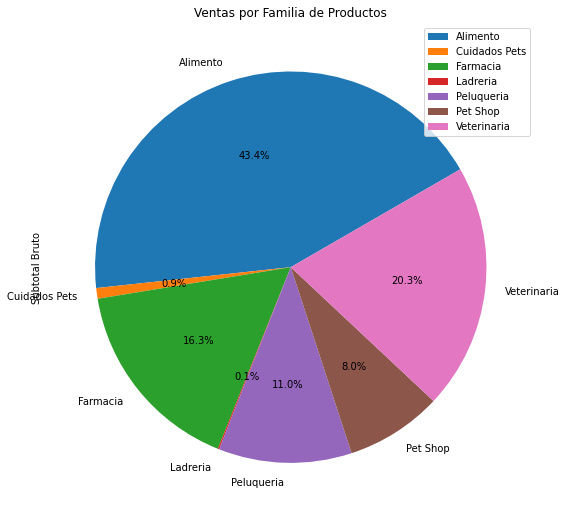

In [ ]:
df_pie = df_lmod_FPS.groupby(['Familia_Producto_Servicio']).sum()
df_pie.index = ['Alimento','Cuidados Pets','Farmacia','Ladreria','Peluqueria','Pet Shop','Veterinaria']
df_pie.plot.pie(y = 'Subtotal Bruto', figsize = (9,9), 
                              title = 'Ventas por Familia de Productos',autopct='%1.1f%%',startangle = 30.)

In [ ]:
import datetime
df_lmod['Fecha_Venta']= pd.to_datetime(df_lmod['Fecha_Venta']) 
df_lmod['MES'] = df_lmod['Fecha_Venta'].dt.strftime('%m')
df_barra = df_lmod.groupby(['MES']).sum()
df_barra

,Numero Documento,Cantidad,Subtotal Bruto
MES,,,
01,107409930.0,7882.0,100546202
02,110233581.0,7792.0,97772001
03,120430538.0,8383.0,110362274
04,116442112.0,7733.0,105912523
05,129811649.0,8523.0,116424865
06,128982062.0,8145.5,110590062
07,137656113.0,8850.0,119634176
08,141988096.0,8830.0,120850211
09,127426531.0,8214.0,112681081


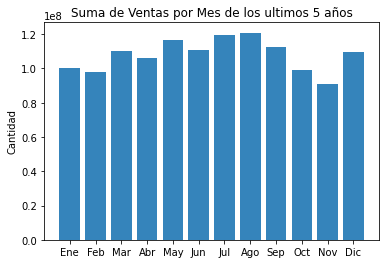

In [ ]:
objects = ('Ene', 'Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic')
y_pos = np.arange(len(objects))
performance = df_barra['Subtotal Bruto'].values
plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Cantidad')
plt.title('Suma de Ventas por Mes de los ultimos 5 años')

plt.show()

##Correlación Entre Familias

Nos preguntamos ¿si existe Alguna correlacion entre Alimento y Veterinaria?

In [ ]:
#Convertimos los valores de categoricos a numericos
#get all categorical columns
cat_columns = df_lmod_FPS.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df_lmod_FPS[cat_columns] = df_lmod_FPS[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [ ]:
df_lmod_FPS

,Sucursal,Numero Documento,Fecha_Venta,Hora_Venta,Familia_Producto_Servicio,SKU,Producto_Servicio,Cantidad,Subtotal Bruto
0,0,2.0,0,0,0,0,0,1.0,2975
1,0,2.0,0,0,0,1,1,1.0,2975
2,0,2.0,0,0,0,2,2,1.0,2975
3,0,2.0,0,0,0,3,3,1.0,2975
4,0,3.0,0,1,1,4,4,1.0,14681
...,...,...,...,...,...,...,...,...,...
78822,1,46010.0,2063,155,0,3342,3210,1.0,15990
78823,1,46011.0,2063,267,1,3184,3053,1.0,43990
78824,1,46012.0,2063,202,1,2887,2238,1.0,64990
78825,0,46013.0,2063,491,4,3442,3310,1.0,3990


In [ ]:
# escalamos los datos 

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_lmod_FPS)
df_lmod_FPS = pd.DataFrame(dataset)

# volvemos a poner nombres a la columnas

df_lmod_FPS = df_lmod_FPS.rename(columns={0:'Sucursal',1:'Numero_Documento',5:'SKU', 4:'Familia_Producto_Servicio',
                                   6:'Producto_Servicio', 2:'Fecha_Venta', 3:'Hora_Venta',7:'Canitdad',8: 'Subtotal_Bruto'})

In [ ]:
df_lmod_FPS

,Sucursal,Numero_Documento,Fecha_Venta,Hora_Venta,Familia_Producto_Servicio,SKU,Producto_Servicio,Canitdad,Subtotal_Bruto
0,0.0,0.000022,0.0,0.000000,0.000000,0.000000,0.000000,0.003484,0.005937
1,0.0,0.000022,0.0,0.000000,0.000000,0.000277,0.000287,0.003484,0.005937
2,0.0,0.000022,0.0,0.000000,0.000000,0.000553,0.000574,0.003484,0.005937
3,0.0,0.000022,0.0,0.000000,0.000000,0.000830,0.000861,0.003484,0.005937
4,0.0,0.000043,0.0,0.001098,0.166667,0.001106,0.001148,0.003484,0.030979
...,...,...,...,...,...,...,...,...,...
78159,1.0,0.999913,1.0,0.170143,0.000000,0.924226,0.921355,0.003484,0.033780
78160,1.0,0.999935,1.0,0.293085,0.166667,0.880531,0.876292,0.003484,0.093680
78161,1.0,0.999957,1.0,0.221734,0.166667,0.798396,0.642365,0.003484,0.138606
78162,0.0,0.999978,1.0,0.538968,0.666667,0.951881,0.950057,0.003484,0.008108


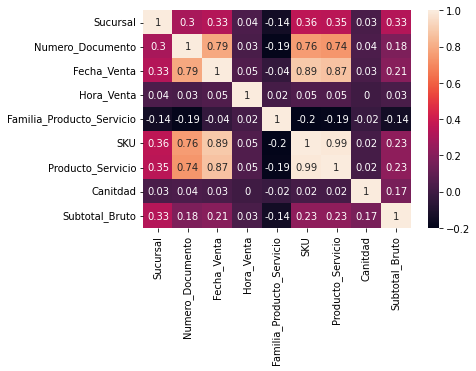

In [ ]:
matrix = df_lmod_FPS.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

##Primeras Conclusiones
 A traves de la exploración de datos, podemos inferir:

*  Que del Grafico de Torta, al agrupar los productos y servicios, en familias, el Cluster con mayor impacto dentro los ingreso es Alimento en el primer lugar con 43,4%, seguido por la familia de Veterinaria con el 20,3% y luego Farmacia con el 16,3%.  

*   Del Grafico de barra, muestra que los meses con mayores ingresos dentro de los 5 años y 10 meses de operacion, es agosto con una venta total de CLP 120.850.211, seguido muy de cerca por Julio por un total de CLP 119.634.176. Lo que nos lleva a pensar que existen temporalidades de productos.

*  La Matriz de correlación, muestra que existe relación entre la fecha y SKU, que es el número único que identifica cada producto y servicio, lo cual refuerza, la existencia de una temporalidad en las ventas. Por lo mismo vamos a continuar con un modelo RNN, para ver que resultados podemos obtener en base a la proyección de las ventas mensuales por producto en 2023
 



##Construccion del primer modelo
Usaremos un RNN

Vamos a sub dividir el conjunto de entrenamiento en entrenamiento y validación.

In [ ]:
df_lmod = df_lmod[(df_lmod['Subtotal Bruto'] > 0)]

In [ ]:
df = pd.DataFrame(df_lmod['Fecha_Venta'])
df = df.assign(Ventas = df_lmod['Subtotal Bruto'])

df_sort=df.sort_values(by=['Fecha_Venta'])


In [ ]:
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78164 entries, 0 to 78043
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha_Venta  78164 non-null  datetime64[ns]
 1   Ventas       78164 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 MB


In [ ]:
df_sort

,Fecha_Venta,Ventas
0,2016-12-16,2975
17,2016-12-16,1618
16,2016-12-16,5600
15,2016-12-16,3832
14,2016-12-16,5450
...,...,...
78038,2022-12-09,63000
78039,2022-12-09,8970
78040,2022-12-09,30990
78042,2022-12-09,47990


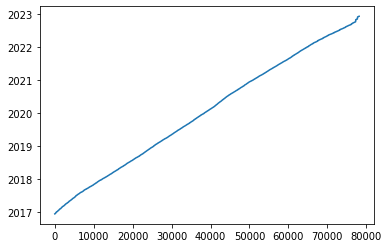

In [ ]:
plt.plot(np.arange(df_sort.Fecha_Venta.shape[0]),df_sort.Fecha_Venta)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd520a87c10>,
      dtype=object)

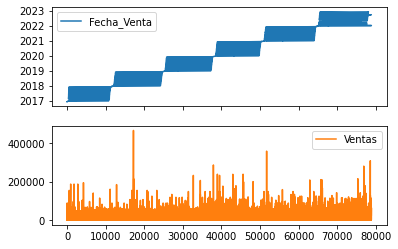

In [ ]:
df_sort.plot(subplots=True)

In [ ]:
# Extraemos la columna SKU para el desarrollo del modelo Deep Learning

df_sort = df_sort.drop(columns=['Fecha_Venta'])
df_sort.head()

,Ventas
0,2975
17,1618
16,5600
15,3832
14,5450


In [ ]:
dataset = df_sort.values
dataset = dataset.astype('float64')
print('Shape conjunto de datos : {}'.format(dataset.shape))
print('Ejemplo : \n{}'.format(dataset[:3]))

Shape conjunto de datos : (78164, 1)
Ejemplo : 
[[2975.]
 [1618.]
 [5600.]]


In [ ]:
split = int(len(dataset) * 0.67)
train, test = dataset[:split,:], dataset[split:,:]
print('Train : {}, Test : {}'.format(train.shape, test.shape)) 

Train : (52369, 1), Test : (25795, 1)


Reordenar los datos para hacer la predicción

X = t

y = t+1

In [ ]:
# Train

look_back = 30
X_train, y_train = [], []

for i in range(len(train)-look_back-1):
  x = train[i:(i+look_back), 0]
  y = train[i+look_back, 0]

  X_train.append(x)
  y_train.append(y)

	
X_train, y_train = np.array(X_train), np.array(y_train)
print('X :{},\nY : {}'.format(X_train[:5], y_train[:5]))

print('\nX shape: {}, y shape: {}'.format(X_train.shape, y_train.shape))

X :[[ 2975.  1618.  5600.  3832.  5450. 15947.  2380.  1618.  1618.  1618.
   1780. 14681. 13328. 15280. 14681.  2975.  2975.  2975.  1780.  5428.
   2620.  8473.  6021. 14319.  6500.  1780.  2620.  2999.   960.  5212.]
 [ 1618.  5600.  3832.  5450. 15947.  2380.  1618.  1618.  1618.  1780.
  14681. 13328. 15280. 14681.  2975.  2975.  2975.  1780.  5428.  2620.
   8473.  6021. 14319.  6500.  1780.  2620.  2999.   960.  5212.  5428.]
 [ 5600.  3832.  5450. 15947.  2380.  1618.  1618.  1618.  1780. 14681.
  13328. 15280. 14681.  2975.  2975.  2975.  1780.  5428.  2620.  8473.
   6021. 14319.  6500.  1780.  2620.  2999.   960.  5212.  5428. 20825.]
 [ 3832.  5450. 15947.  2380.  1618.  1618.  1618.  1780. 14681. 13328.
  15280. 14681.  2975.  2975.  2975.  1780.  5428.  2620.  8473.  6021.
  14319.  6500.  1780.  2620.  2999.   960.  5212.  5428. 20825. 10067.]
 [ 5450. 15947.  2380.  1618.  1618.  1618.  1780. 14681. 13328. 15280.
  14681.  2975.  2975.  2975.  1780.  5428.  2620.  8473.

In [ ]:
# Test
look_back = 30
X_test, y_test = [], []

for i in range(len(test)-look_back-1):
  x = test[i:(i+look_back), 0]
  y = test[i+look_back, 0]

  X_test.append(x)
  y_test.append(y)

	
X_test, y_test = np.array(X_test), np.array(y_test)
print('X :{},\nY : {}'.format(X_test[:5], y_test[:5]))

X :[[ 3990. 21990. 15000. 50000. 15990. 11990. 24990. 30000. 10990. 15000.
   7990. 61990. 10990. 45980. 12990.  8990.  7990. 12990. 18990. 13990.
  11990. 15000. 31980. 36000. 60000. 17990. 12990. 29750. 24990. 14990.]
 [21990. 15000. 50000. 15990. 11990. 24990. 30000. 10990. 15000.  7990.
  61990. 10990. 45980. 12990.  8990.  7990. 12990. 18990. 13990. 11990.
  15000. 31980. 36000. 60000. 17990. 12990. 29750. 24990. 14990. 11990.]
 [15000. 50000. 15990. 11990. 24990. 30000. 10990. 15000.  7990. 61990.
  10990. 45980. 12990.  8990.  7990. 12990. 18990. 13990. 11990. 15000.
  31980. 36000. 60000. 17990. 12990. 29750. 24990. 14990. 11990.  6500.]
 [50000. 15990. 11990. 24990. 30000. 10990. 15000.  7990. 61990. 10990.
  45980. 12990.  8990.  7990. 12990. 18990. 13990. 11990. 15000. 31980.
  36000. 60000. 17990. 12990. 29750. 24990. 14990. 11990.  6500. 11990.]
 [15990. 11990. 24990. 30000. 10990. 15000.  7990. 61990. 10990. 45980.
  12990.  8990.  7990. 12990. 18990. 13990. 11990. 15000.

Actualmente nuestro conjunto de datos de entrada se encuentra organizados como **[#muestras, dato]**, pero necesitamos que sea **[#muestras, time steps, dato]** para que sea una entrada correcta para la RNN (de acuerdo a la [documentación](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN)).

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print('train : {}, test : {}'.format(X_train.shape, X_test.shape))

train : (52338, 1, 30), test : (25764, 1, 30)


## Modelo - Simple RNN

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

model = Sequential()

model.add(SimpleRNN(8, activation='relu',input_shape=(1,look_back), return_sequences = True))
model.add(SimpleRNN(16, activation='relu', return_sequences = True, dropout=0.2))
model.add(SimpleRNN(32, activation='relu', return_sequences = True))
model.add(SimpleRNN(16, activation='relu', return_sequences = True))
model.add(SimpleRNN(8, activation='relu'))
model.add(Dense(1, activation='linear'))



print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 8)              312       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1, 16)             400       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1, 32)             1568      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 16)             784       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 3,273
Trainable params: 3,273
Non-trainabl

Compilar

In [ ]:
model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics = ['mse'])

Entrenamiento

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=500, 
                    batch_size=25, 
                    verbose=2, 
                    validation_split=0.2)

Epoch 1/500
1675/1675 - 12s - loss: 162985728.0000 - mse: 162985728.0000 - val_loss: 258453072.0000 - val_mse: 258453072.0000 - 12s/epoch - 7ms/step
Epoch 2/500
1675/1675 - 7s - loss: 155448144.0000 - mse: 155448144.0000 - val_loss: 252256576.0000 - val_mse: 252256576.0000 - 7s/epoch - 4ms/step
Epoch 3/500
1675/1675 - 7s - loss: 154147952.0000 - mse: 154147952.0000 - val_loss: 252143104.0000 - val_mse: 252143104.0000 - 7s/epoch - 4ms/step
Epoch 4/500
1675/1675 - 7s - loss: 153788128.0000 - mse: 153788128.0000 - val_loss: 246955120.0000 - val_mse: 246955120.0000 - 7s/epoch - 4ms/step
Epoch 5/500
1675/1675 - 7s - loss: 153519936.0000 - mse: 153519936.0000 - val_loss: 250031792.0000 - val_mse: 250031792.0000 - 7s/epoch - 4ms/step
Epoch 6/500
1675/1675 - 7s - loss: 153340912.0000 - mse: 153340912.0000 - val_loss: 253146992.0000 - val_mse: 253146992.0000 - 7s/epoch - 4ms/step
Epoch 7/500
1675/1675 - 7s - loss: 153433776.0000 - mse: 153433776.0000 - val_loss: 262435136.0000 - val_mse: 262435

Curva función Costo

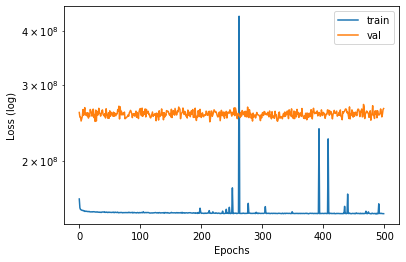

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss (log)')
plt.yscale('log')
plt.legend()

plt.show()

Predicción

In [ ]:
# Obtener predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [ ]:
# Volver a magnitud original
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

Graficar resultados

In [ ]:
# Creamos un arreglo vacío para acomodar las predicciones de entrenamiento en el rango correcto
train_predict_curve = np.empty_like(dataset)
train_predict_curve[:, :] = np.nan
train_predict_curve[look_back:len(train_predictions)+look_back, :] = train_predictions

# Hacemos lo mismo para las predicciones del conjunto de test y ubicamos las predicciones luego de las predicciones de entrenamiento.
test_predict_curve = np.empty_like(dataset)
test_predict_curve[:, :] = np.nan
test_predict_curve[len(train_predictions)+(look_back*2)+1:len(dataset)-1, :] = test_predictions

# Graficamos
a1, = plt.plot(scaler.inverse_transform(dataset))
a2, = plt.plot(train_predict_curve)
a3, = plt.plot(test_predict_curve)
plt.legend([a1, a2, a3], ['real','pred train','pred test'])
plt.show()

##Analisis de la Familia Alimento

In [ ]:
df_lmod_Al = df_lmod[(df_lmod.Familia_Producto_Servicio == 'ALIMENTO')&(df_lmod['Subtotal Bruto'] > 0)]
df_lmod_Al

,Sucursal,Numero Documento,Fecha_Venta,Hora_Venta,Familia_Producto_Servicio,SKU,Producto_Servicio,Cantidad,Subtotal Bruto
4,Casa Matriz,3.0,16/12/2016,10:52 AM,ALIMENTO,12295045,PRO PLAN DOG DELICATE SMALL BREED 3KG,1.0,14681
7,Casa Matriz,5.0,16/12/2016,01:18 PM,ALIMENTO,12294992,PRO PLAN DOG EXIGENT SM BR 3KG,1.0,14681
13,Casa Matriz,10.0,16/12/2016,07:52 PM,ALIMENTO,12294283,PRO PLAN CAT ADULT CAT 3 KGS,1.0,15947
19,Casa Matriz,14.0,17/12/2016,09:19 AM,ALIMENTO,12294993,PRO PLAN DOG PUPPY SMALL BREED 3 KG,1.0,14319
37,Casa Matriz,23.0,17/12/2016,03:54 PM,ALIMENTO,12294293,PRO PLAN CAT CAT KITTEN 1KG,1.0,6436
...,...,...,...,...,...,...,...,...,...
78815,Casa Matriz,46007.0,01/10/2022,03:10 PM,ALIMENTO,1615312031411,PROPLAN PERRO PUPPY RAZA PEQUEÑA 3 KG,1.0,24990
78821,Casa Matriz,46009.0,01/10/2022,03:48 PM,ALIMENTO,1646158460765,PROPLAN PERRO SENSITIVE SKIN ADULTO AND STOMAC...,1.0,24990
78823,Clínica Móvil,46011.0,01/10/2022,04:54 PM,ALIMENTO,1633108748146,PROPLAN PERRO VETERINARY DIETS EN 7.5 KG,1.0,43990
78824,Clínica Móvil,46012.0,01/10/2022,05:20 PM,ALIMENTO,1612544511903,PROPLAN PERRO REDUCED CALORIE RAZA MEDIANA-GRA...,1.0,64990


In [ ]:
df_lmod_Al['Sucursal'].value_counts()

Casa Matriz      20786
Clínica Móvil     5075
Name: Sucursal, dtype: int64

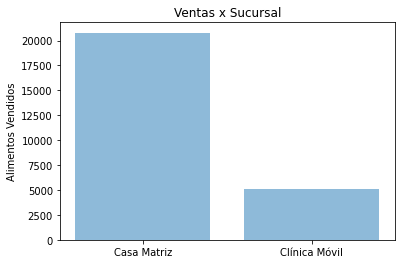

In [ ]:
objects = ('Casa Matriz', 'Clínica Móvil')
y_pos = np.arange(len(objects))
performance = [20786,5075]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Alimentos Vendidos')
plt.title('Ventas x Sucursal')

plt.show()

In [ ]:
df_al_perro = df_lmod_Al[(df_lmod_Al.Producto_Servicio.str.contains(' DOG | PERRO | PUPPY | CACHORRO | PEDIGREE | Excellent | '))]
df_al_gato = df_lmod_Al[(df_lmod_Al.Producto_Servicio.str.contains(' GATO | CAT | KITTEN | FELINE '))]

In [ ]:
df_al_perro

,Sucursal,Numero Documento,Fecha_Venta,Hora_Venta,Familia_Producto_Servicio,SKU,Producto_Servicio,Cantidad,Subtotal Bruto
4,Casa Matriz,3.0,16/12/2016,10:52 AM,ALIMENTO,12295045,PRO PLAN DOG DELICATE SMALL BREED 3KG,1.0,14681
7,Casa Matriz,5.0,16/12/2016,01:18 PM,ALIMENTO,12294992,PRO PLAN DOG EXIGENT SM BR 3KG,1.0,14681
13,Casa Matriz,10.0,16/12/2016,07:52 PM,ALIMENTO,12294283,PRO PLAN CAT ADULT CAT 3 KGS,1.0,15947
19,Casa Matriz,14.0,17/12/2016,09:19 AM,ALIMENTO,12294993,PRO PLAN DOG PUPPY SMALL BREED 3 KG,1.0,14319
37,Casa Matriz,23.0,17/12/2016,03:54 PM,ALIMENTO,12294293,PRO PLAN CAT CAT KITTEN 1KG,1.0,6436
...,...,...,...,...,...,...,...,...,...
78815,Casa Matriz,46007.0,01/10/2022,03:10 PM,ALIMENTO,1615312031411,PROPLAN PERRO PUPPY RAZA PEQUEÑA 3 KG,1.0,24990
78821,Casa Matriz,46009.0,01/10/2022,03:48 PM,ALIMENTO,1646158460765,PROPLAN PERRO SENSITIVE SKIN ADULTO AND STOMAC...,1.0,24990
78823,Clínica Móvil,46011.0,01/10/2022,04:54 PM,ALIMENTO,1633108748146,PROPLAN PERRO VETERINARY DIETS EN 7.5 KG,1.0,43990
78824,Clínica Móvil,46012.0,01/10/2022,05:20 PM,ALIMENTO,1612544511903,PROPLAN PERRO REDUCED CALORIE RAZA MEDIANA-GRA...,1.0,64990


In [ ]:
df_al_gato

,Sucursal,Numero Documento,Fecha_Venta,Hora_Venta,Familia_Producto_Servicio,SKU,Producto_Servicio,Cantidad,Subtotal Bruto
13,Casa Matriz,10.0,16/12/2016,07:52 PM,ALIMENTO,12294283,PRO PLAN CAT ADULT CAT 3 KGS,1.0,15947
37,Casa Matriz,23.0,17/12/2016,03:54 PM,ALIMENTO,12294293,PRO PLAN CAT CAT KITTEN 1KG,1.0,6436
113,Casa Matriz,80.0,20/12/2016,10:17 PM,ALIMENTO,12294293,PRO PLAN CAT CAT KITTEN 1KG,1.0,6436
142,Casa Matriz,96.0,21/12/2016,08:39 PM,ALIMENTO,12294293,PRO PLAN CAT CAT KITTEN 1KG,1.0,6436
146,Casa Matriz,99.0,22/12/2016,10:58 AM,ALIMENTO,12294320,PRO PLAN CAT URINARY 3KG,1.0,5951
...,...,...,...,...,...,...,...,...,...
78775,Casa Matriz,45976.0,30/09/2022,05:21 PM,ALIMENTO,1620164006362,PROPLAN GATO ADULT LIVE CLREAR 3 KG,1.0,30990
78787,Clínica Móvil,45986.0,01/10/2022,09:42 AM,ALIMENTO,1643816558352,CHAMPION CAT ADULTO CARNE 20 KG,1.0,40000
78804,Clínica Móvil,45998.0,01/10/2022,12:15 PM,ALIMENTO,1611686602992,PROPLAN GATO KITTEN 7.5 KG,1.0,47990
78812,Clínica Móvil,46005.0,01/10/2022,02:19 PM,ALIMENTO,1612545059338,PROPLAN GATO STERILIZED 7.5 KG,1.0,47990


In [ ]:
df_al_perro['Producto_Servicio'].value_counts()

PUPPY SMALL BREED 3 KG             570
EXIGENT SMALL BREED 3 KG           487
ADULT SMALL BREED 3 KG             385
PUPPY DOG SMALL BREED              368
ADULT EXIGENT SMALL BREED          299
                                  ... 
CAT CHOW GATOS 21KG                  1
REDUCED CALORIE 3KG                  1
DOG CHOW ADULTO EDAD MADURA 21K      1
CAT CHOW ADULTO CARNE 24 KG          1
Puppy small breed 7,5 Kg             1
Name: Producto_Servicio, Length: 747, dtype: int64

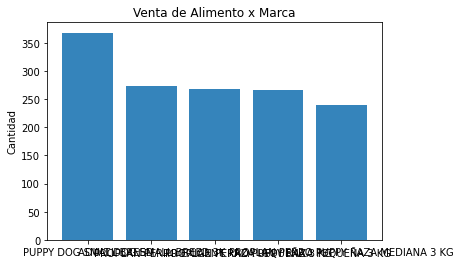

In [ ]:
objects = ('PUPPY DOG SMALL BREED', 'ADULT DOG SMALL BREED 3K','PROPLAN PERRO EXIGENT RAZA PEQUEÑA 3 KG ','PROPLAN PERRO PUPPY RAZA PEQUEÑA 3 KG', 'PROPLAN PERRO PUPPY RAZA MEDIANA 3 KG')
y_pos = np.arange(len(objects))
performance = [368,274,268,266,240]

plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Cantidad')
plt.title('Venta de Alimento x Marca')

plt.show()

In [ ]:
df_al_gato['Producto_Servicio'].value_counts()

PROPLAN GATO URINARY 1 KG                  172
PROPLAN GATO KITTEN 1 KG                   169
PROPLAN GATO STERILIZED 3 KG               163
PROPLAN LATA GATO KITTEN 85 G              154
PROPLAN GATO URINARY 3 KG                  150
                                          ... 
ORIJEN GATO ORIGINAL 1,8 KG                  1
PROPLAN GATO VETERINARY DIETS DM 1,5 KG      1
ORIJEN GATO FIT & TRIM 5,4 KG                1
PRO PLAN CAT KITTEN 7.5 KG                   1
MASTER CAT POUCH SALMON 85 GR                1
Name: Producto_Servicio, Length: 155, dtype: int64

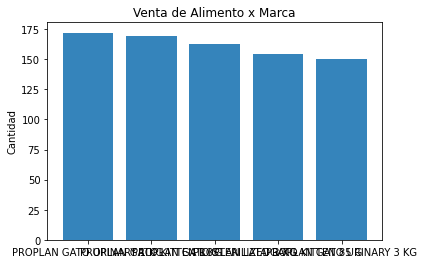

In [ ]:
objects_gato=("PROPLAN GATO URINARY 1 KG","PROPLAN GATO KITTEN 1 KG","PROPLAN GATO STERILIZED 3 KG","PROPLAN LATA GATO KITTEN 85 G","PROPLAN GATO URINARY 3 KG")
y_pos = np.arange(len(objects_gato))
performance = [172,169,163,154,150]

plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects_gato)
plt.ylabel('Cantidad')
plt.title('Venta de Alimento x Marca')

plt.show()

In [ ]:
#Matriz de correlacion con pandas

df_lmod_Al.corr()

,Numero Documento,Cantidad,Subtotal Bruto
Numero Documento,1.000000,0.038821,0.241465
Cantidad,0.038821,1.000000,0.150294
Subtotal Bruto,0.241465,0.150294,1.000000


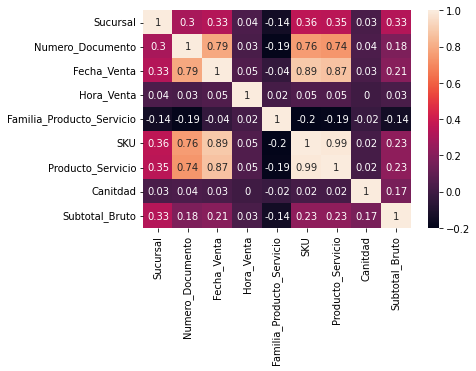

In [ ]:
#imprimir matriz de correlacion

matrix = df_lmod_FPS.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

##La Hipotesis:

**Agosto es el mes historico con mayores ventas en LickanPets**

**Problematica:**

* Definir en base a las ventas historicas, volumen de venta mensual en 2023

* nos gustaria hacer una claseterizacion por familia de producto o por tipo de producto y conocer la proyección de venta.


**Ideas fuezas**

* ¿Cual es el alimento que más se vende y en que momento del mes?

* La segunda semana del mes se vende más alimentos Kitten

* Los perros que consumen PRO PLAN DOG PUPPY SMALL BREED 
 
* La tercera semana de cada mes el producto que más se vende es el PROPLAN GATO KITTEN

* Dividir en cuadrantes y ver tendencia de ventas para comida de perro